In [3]:
import pandas as pd
import talib.abstract as ta
import pandas_datareader as web

In [6]:
start_date = "2010-01-1"
end_date = "2020-12-31"
data = web.DataReader(name="TSLA", data_source='yahoo', start=start_date, end=end_date)

In [7]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,1.666667,1.169333,1.266667,1.592667,281494500.0,1.592667
2010-06-30,2.028000,1.553333,1.719333,1.588667,257806500.0,1.588667
2010-07-01,1.728000,1.351333,1.666667,1.464000,123282000.0,1.464000
2010-07-02,1.540000,1.247333,1.533333,1.280000,77097000.0,1.280000
2010-07-06,1.333333,1.055333,1.333333,1.074000,103003500.0,1.074000
...,...,...,...,...,...,...
2020-12-24,222.029999,213.666672,214.330002,220.589996,68596800.0,220.589996
2020-12-28,227.133331,220.266663,224.836670,221.229996,96835800.0,221.229996
2020-12-29,223.300003,218.333328,220.333328,221.996674,68732400.0,221.996674


In [8]:
data.reset_index(inplace=True)

In [9]:
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,1.666667,1.169333,1.266667,1.592667,281494500.0,1.592667
1,2010-06-30,2.028000,1.553333,1.719333,1.588667,257806500.0,1.588667
2,2010-07-01,1.728000,1.351333,1.666667,1.464000,123282000.0,1.464000
3,2010-07-02,1.540000,1.247333,1.533333,1.280000,77097000.0,1.280000
4,2010-07-06,1.333333,1.055333,1.333333,1.074000,103003500.0,1.074000
...,...,...,...,...,...,...,...
2642,2020-12-24,222.029999,213.666672,214.330002,220.589996,68596800.0,220.589996
2643,2020-12-28,227.133331,220.266663,224.836670,221.229996,96835800.0,221.229996
2644,2020-12-29,223.300003,218.333328,220.333328,221.996674,68732400.0,221.996674
2645,2020-12-30,232.199997,222.786667,224.000000,231.593338,128538000.0,231.593338


In [14]:
data["APO"] = ta.APO(data["Close"], fastperiod=12, slowperiod=26, matype=0)

<AxesSubplot: >

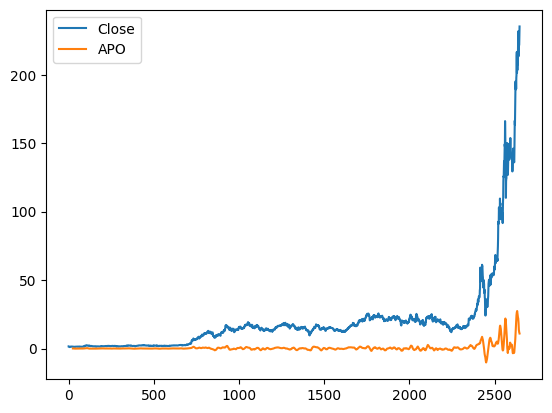

In [15]:
data[["Close", "APO"]].plot()

In [17]:
macd, macdsignal, macdhist = ta.MACD(data["Close"], fastperiod=12, slowperiod=26, signalperiod=9)

In [20]:
data["macd"] = macd
data["macdsignal"] = macdsignal
data["macdhist"] = macdhist

<AxesSubplot: >

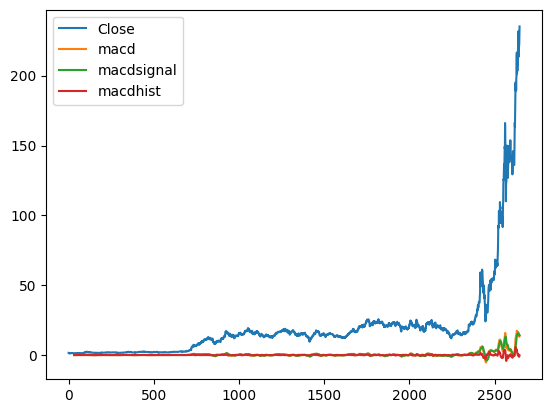

In [23]:
data[["Close", "macd", "macdsignal", "macdhist"]].plot()

In [26]:
data["PPO"] = ta.PPO(data["Close"], fastperiod=12, slowperiod=26, matype=0)

<AxesSubplot: >

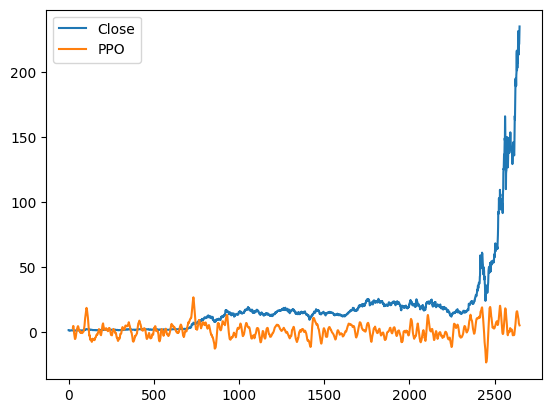

In [27]:
data[["Close", "PPO"]].plot()